In [2]:
# Cell 1: Import Libraries and Load Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data
df = pd.read_excel('../../data/IAG.xlsx')

In [3]:
# Cell 2: Missing Values Analysis
print("MISSING VALUES ANALYSIS")
print("-" * 50)

# Overall missing values check
missing_by_column = df.isnull().sum()
print("Missing values by column:")
print(missing_by_column[missing_by_column > 0])

# Specific analysis of agent helpfulness missing values
agent_missing = df['iag_if_agent_staff_helpful_scale11'].isna()
print(f"\nTotal missing agent helpfulness scores: {agent_missing.sum()}")
print(f"Percentage: {(agent_missing.sum()/len(df)*100):.2f}%")

# Compare NPS distributions for missing vs non-missing
print("\nNPS distribution comparison:")
print("\na) With missing agent scores:")
print(df[agent_missing]['Likely to recommend'].value_counts(normalize=True))
print("\nb) Without missing agent scores:")
print(df[~agent_missing]['Likely to recommend'].value_counts(normalize=True))

# Missing values pattern by product type
print("\nMissing agent scores by product type:")
print(df[agent_missing]['iag_product_type_auto'].value_counts(normalize=True))
print("\nOverall product type distribution:")
print(df['iag_product_type_auto'].value_counts(normalize=True))

MISSING VALUES ANALYSIS
--------------------------------------------------
Missing values by column:
iag_age_band_auto                                            212
iag_overall_satisfaction_osat_scale11                       5634
iag_if_agent_providing_relevant_easy_information_scale11    5634
iag_if_agent_staff_helpful_scale11                          5634
iag_if_agent_providing_efficient_service_scale11            5634
iag_if_agent_valued_customer_scale11                        5634
iag_trust_confidence_scale11                                 161
iag_trust_operating_with_integrity_scale11                   225
iag_trust_genuinely_cares_scale11                            258
iag_emotion_question_alt                                     577
iag_additional_cmt_comment                                  5991
iag_reason_ltr_comment                                      2138
iag_value_flexibility_in_pricing_scale11                     549
iag_value_clarity_of_policy_scale11                   

In [4]:
# Cell 3: Counter-intuitive Cases Analysis
print("COUNTER-INTUITIVE CASES ANALYSIS")
print("-" * 50)

# High price satisfaction but low NPS
unusual_cases = df[
    (df['iag_value_price_of_policy_reflects_scale11'] >= 8) & 
    (df['Likely to recommend'].isin(['Detract', 'Super Detract']))
]

print("Cases with high price satisfaction (≥8) but low NPS:")
print(f"Total cases: {len(unusual_cases)}")
print("\nBreakdown by product type:")
print(unusual_cases['iag_product_type_auto'].value_counts())
print("\nBreakdown by age band:")
print(unusual_cases['iag_age_band_auto'].value_counts())

# High agent satisfaction but low NPS
unusual_service = df[
    (df['iag_if_agent_staff_helpful_scale11'] >= 8) & 
    (df['Likely to recommend'].isin(['Detract', 'Super Detract']))
]

print("\nCases with high service satisfaction (≥8) but low NPS:")
print(f"Total cases: {len(unusual_service)}")
print("\nBreakdown by product type:")
print(unusual_service['iag_product_type_auto'].value_counts())

COUNTER-INTUITIVE CASES ANALYSIS
--------------------------------------------------
Cases with high price satisfaction (≥8) but low NPS:
Total cases: 171

Breakdown by product type:
iag_product_type_auto
Private Motor Line    102
Homeowners Line        53
Vehicle                12
Home Pack               3
Home                    1
Name: count, dtype: int64

Breakdown by age band:
iag_age_band_auto
65+      49
55-64    43
45-54    29
25-34    19
35-44    17
0-24      6
Name: count, dtype: int64

Cases with high service satisfaction (≥8) but low NPS:
Total cases: 169

Breakdown by product type:
iag_product_type_auto
Private Motor Line    79
Homeowners Line       39
Vehicle               34
Home Pack              7
Content                5
Home                   3
Landlord               2
Name: count, dtype: int64


In [5]:
# Cell 4: Interaction Effects Analysis
print("INTERACTION EFFECTS ANALYSIS")
print("-" * 50)

def nps_to_numeric(x):
    nps_map = {'Super Detract': 0, 'Detract': 1, 'Passive': 2, 'Promote': 3}
    return x.map(nps_map)

# Analyze correlations by product type
correlations_by_product = df.groupby('iag_product_type_auto').apply(
    lambda x: pd.Series({
        'price_nps_corr': x['iag_value_price_of_policy_reflects_scale11'].corr(nps_to_numeric(x['Likely to recommend'])),
        'agent_nps_corr': x['iag_if_agent_staff_helpful_scale11'].corr(nps_to_numeric(x['Likely to recommend'])),
        'count': len(x)
    })
).round(3)

print("Correlations by product type:")
print(correlations_by_product)

INTERACTION EFFECTS ANALYSIS
--------------------------------------------------
Correlations by product type:
                       price_nps_corr  agent_nps_corr   count
iag_product_type_auto                                        
Content                         0.699           0.742   210.0
EasyRider                         NaN             NaN     1.0
Home                            0.743           0.784    80.0
Home Pack                       0.753           0.745   165.0
Homeowners Line                 0.693           0.708  2936.0
Jetsetter                         NaN             NaN     1.0
Landlord                        0.917           0.538     6.0
Private Motor Line              0.635           0.642  4943.0
Vehicle                         0.701           0.732   848.0
Wheels                          0.771           0.663    74.0


e:\Apps\anaconda3\envs\iag\lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
e:\Apps\anaconda3\envs\iag\lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
e:\Apps\anaconda3\envs\iag\lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
e:\Apps\anaconda3\envs\iag\lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
e:\Apps\anaconda3\envs\iag\lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
e:\Apps\anaconda3\envs\iag\lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
e:\Apps\anaconda3\en

e:\Apps\anaconda3\envs\iag\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Apps\anaconda3\envs\iag\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Apps\anaconda3\envs\iag\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\Apps\anaconda3\envs\iag\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.type

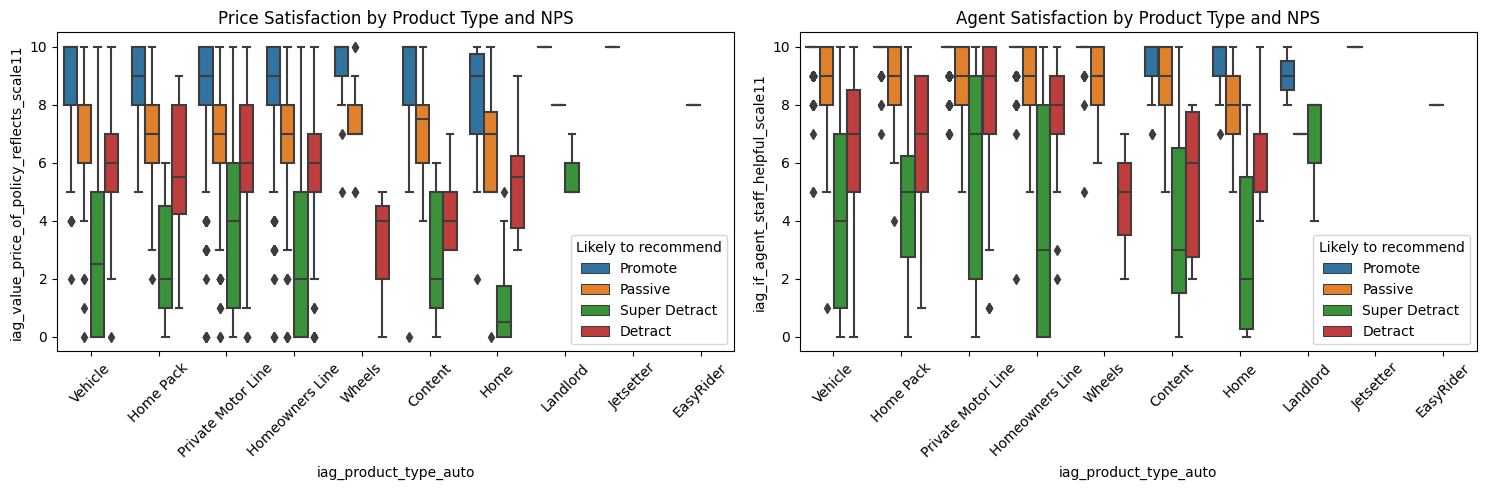

In [6]:
# Cell 5: Visualization of Patterns
# Plot 1: Distribution of NPS by Product Type and Satisfaction Scores
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='iag_product_type_auto', 
            y='iag_value_price_of_policy_reflects_scale11',
            hue='Likely to recommend', data=df)
plt.xticks(rotation=45)
plt.title('Price Satisfaction by Product Type and NPS')

plt.subplot(1, 2, 2)
sns.boxplot(x='iag_product_type_auto',
            y='iag_if_agent_staff_helpful_scale11',
            hue='Likely to recommend', data=df)
plt.xticks(rotation=45)
plt.title('Agent Satisfaction by Product Type and NPS')

plt.tight_layout()
plt.show()

# Deep Dive Analysis of IAG Customer Satisfaction Data

## 1. Missing Values Analysis

### Key Findings
* Significant missing data in customer interaction metrics (>60% missing)
* Missing agent helpfulness scores concentrated in two product lines:
    * Private Motor Line (61.63%)
    * Homeowners Line (38.37%)
* Other product lines have complete agent interaction data

### NPS Distribution Comparison

#### With Missing Agent Scores
- Promote: 65.14%
- Passive: 21.48%
- Super Detract: 7.37%
- Detract: 6.02%

#### Without Missing Agent Scores
- Promote: 68.35%
- Passive: 20.91%
- Super Detract: 5.98%
- Detract: 4.77%

**Insight:** Despite large proportion of missing data, NPS distributions remain relatively stable, suggesting missing data might not be introducing significant bias.

## 2. Counter-intuitive Cases Analysis

### High Price Satisfaction but Low NPS (171 cases)
#### Product Distribution
- Private Motor Line: 102 cases
- Homeowners Line: 53 cases
- Vehicle: 12 cases
- Others: 4 cases

#### Age Distribution
- 65+: 49 cases
- 55-64: 43 cases
- 45-54: 29 cases
- Younger age groups: 42 cases combined

### High Service Satisfaction but Low NPS (169 cases)
**Notable Pattern:** Vehicle products represent:
- 9% of total dataset
- 20% of high-service-low-NPS cases
- Suggests unique challenges in Vehicle product satisfaction

## 3. Interaction Effects Analysis

### Correlation Patterns by Product Type

| Product Type | Price-NPS Corr | Agent-NPS Corr | Count |
|--------------|----------------|----------------|--------|
| Landlord | 0.917 | 0.538 | 6 |
| Wheels | 0.771 | 0.663 | 74 |
| Home Pack | 0.753 | 0.745 | 165 |
| Home | 0.743 | 0.784 | 80 |
| Vehicle | 0.701 | 0.732 | 848 |
| Content | 0.699 | 0.742 | 210 |
| Homeowners Line | 0.693 | 0.708 | 2936 |
| Private Motor Line | 0.635 | 0.642 | 4943 |

### Key Insights
1. **Product-Specific Patterns**
  - Different products show distinct relationships between service metrics and NPS
  - Price satisfaction more important for some products (e.g., Landlord)
  - Agent interaction more crucial for others (e.g., Home)

2. **Scale Effects**
  - Larger product lines (Private Motor, Homeowners) show more moderate correlations
  - Smaller product lines show more extreme correlations (possibly due to sample size)

## 4. Visualization Insights

### Price Satisfaction Patterns
- Clear separation between NPS categories across products
- Promote category consistently shows higher price satisfaction
- Super Detract shows highest variability

### Agent Satisfaction Patterns
- Less clear separation than price satisfaction
- More consistent patterns across product types
- Higher baseline satisfaction levels overall

## 5. Business Implications

### 1. Data Collection Strategy
- Need to investigate why agent scores are missing for specific product lines
- Potential process improvements needed in Private Motor and Homeowners Line

### 2. Product-Specific Approach
- Different products require different satisfaction strategies
- Vehicle products need special attention in service-satisfaction translation

### 3. Age-Related Considerations
- Older customers (65+) show unique satisfaction patterns
- Need for age-specific satisfaction strategies

---
*Note: All analyses are based on the available data, with acknowledgment of missing values and potential biases.*